In [1]:
!pip install --upgrade pip
!pip install tensorflow
import os

     |████████████████████████████████| 1.7 MB 798 kB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.18.0 requires tensorflow-io-gcs-filesystem==0.18.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
dask-cudf 21.8.3 requires cupy-cuda114, which is not installed.
cudf 21.8.3 requires cupy-cuda110, which is n

# Defining each of these directories

In [2]:
train_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Train')
validation_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Validiation')
test_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Test')

# Directory with our training defective/nondefective pictures
train_defective_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Train/Defective')
train_nondefective_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Train/Non Defective')
# Directory with our validation defective/nondefective pictures
validation_defective_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Validiation/Defective')
validation_nondefective_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Validiation/Non Defective')

test_defective_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Test/Defective')
test_nondefective_dir = os.path.join('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Train/Non Defective')

**Now, let's see what the filenames look like in the training directories:**

In [3]:
train_defective_fnames = os.listdir(train_defective_dir )
train_nondefective_fnames = os.listdir( train_nondefective_dir)

print(train_defective_fnames[:20])
print(train_nondefective_fnames[:20])

['aug_prefix_0_5708.jpg', 'aug_prefix_0_5937.jpg', 'aug_prefix_0_4815.jpg', 'aug_prefix_0_4895.jpg', 'aug_prefix_0_4387.jpg', 'aug_prefix_0_4316.jpg', 'aug_prefix_0_5537.jpg', '131437543_500273490949549_5045378072687137331_n.jpg', 'aug_prefix_0_4605.jpg', 'aug_prefix_0_4086.jpg', 'aug_prefix_0_1063.jpg', 'aug_prefix_0_3370.jpg', 'aug_prefix_0_7669.jpg', 'aug_prefix_0_1538.jpg', 'aug_prefix_0_3222.jpg', 'aug_prefix_0_7595.jpg', 'aug_prefix_0_1593.jpg', 'aug_prefix_0_4066.jpg', '131051004_382613492830631_1306891331783850055_n.jpg', 'aug_prefix_0_4454.jpg']
['aug_prefix_0_3590.jpg', 'aug_prefix_0_3743.jpg', 'aug_prefix_0_4218.jpg', 'aug_prefix_0_7326.jpg', 'aug_prefix_0_2562.jpg', 'aug_prefix_0_3535.jpg', 'aug_prefix_0_3733.jpg', 'aug_prefix_0_5704.jpg', 'aug_prefix_0_1467.jpg', 'aug_prefix_0_8673.jpg', 'aug_prefix_0_1812.jpg', 'aug_prefix_0_8516.jpg', 'aug_prefix_0_5345.jpg', 'aug_prefix_0_8086.jpg', 'aug_prefix_0_4562.jpg', 'aug_prefix_0_4345.jpg', 'aug_prefix_0_7316.jpg', 'aug_prefix_0

In [4]:
print('total training defective images :', len(os.listdir(train_defective_dir)))
print('total training non-defective images :', len(os.listdir(train_nondefective_dir)))


print('total validation defective images :', len(os.listdir( validation_defective_dir ) ))
print('total validation non-defective images :', len(os.listdir( validation_nondefective_dir) ))

print('total test defective images :', len(os.listdir( validation_defective_dir ) ))
print('total test non-defective images :', len(os.listdir( validation_nondefective_dir) ))

total training defective images : 490
total training non-defective images : 490
total validation defective images : 140
total validation non-defective images : 140
total test defective images : 140
total test non-defective images : 140


dimensionality**Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:**

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x10 configuration
nrows = 10
ncols = 10

# Index for iterating over images
pic_index = 0

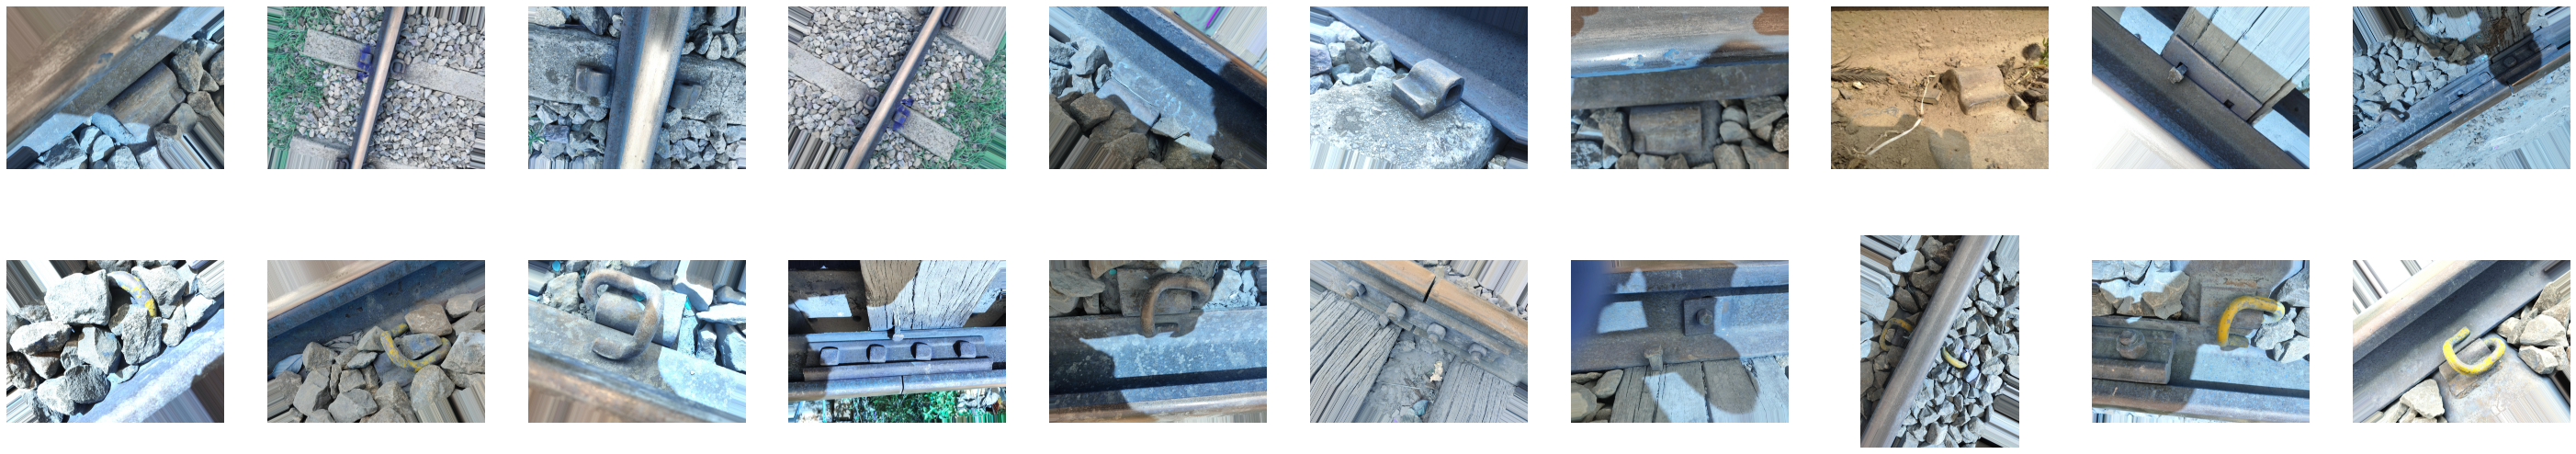

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 10
next_defective_pix = [os.path.join(train_defective_dir, fname) 
                for fname in train_defective_fnames[pic_index-10:pic_index]]
next_nondefective_pix = [os.path.join(train_nondefective_dir, fname) 
                for fname in train_nondefective_fnames[pic_index-10:pic_index]]


for i, img_path in enumerate(next_defective_pix+next_nondefective_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf

**The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.**

#  Building the Model

In [8]:
#MUL 1 - Inception - ST
#import keras
# from keras.applications import InceptionV3
# from keras.applications import Xception
from tensorflow.keras.applications import InceptionResNetV2
#from keras.applications import V2
#model = VGG16()
from  tensorflow.keras.models import Model
# from keras.layers import concatenate
from  tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, GRU, Reshape, Concatenate,Bidirectional, Conv2D, MaxPooling2D, UpSampling2D, Flatten
#from  tensorflow.keras.applications.mobilenet import preprocess_input

from  tensorflow.keras.layers import GaussianNoise
input_img = Input(shape = (600, 600, 3))
#f1_x = tensorflow.keras.layers.Flatten()
#encoder
f1_x = Conv2D(128, (6, 6), activation='relu', kernel_initializer='he_normal', padding='valid')(input_img) #28 x 28 x 32
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.4)
f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x) #14 x 14 x 32
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.35)
f1_x = Conv2D(64, (4, 4), activation='relu', kernel_initializer='he_normal', padding='valid')(f1_x) #14 x 14 x 64
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.33)
f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x) #7 x 7 x 64
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.3)
f1_x = Conv2D(64, (4, 4), activation='relu', padding='valid',kernel_initializer='he_normal')(f1_x) #7 x 7 x 128 (small and thick)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.4)
f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.49)
#decoder
f1_x = Conv2D(64, (6, 6), activation='relu', padding='valid',kernel_initializer='he_normal')(f1_x) #7 x 7 x 128
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.36)
f1_x = UpSampling2D((2,2))(f1_x) # 14 x 14 x 128
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.38)
f1_x = Conv2D(128, (6, 6), activation='relu', padding='valid',kernel_initializer='he_normal')(f1_x) # 14 x 14 x 64
tf.keras.layers.BatchNormalization()
#dropout=0.2
f1_x = UpSampling2D((2,2))(f1_x) # 28 x 28 x 64
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.37)
f1_x = Conv2D(1, (6, 6), activation='sigmoid', padding='valid', kernel_initializer='he_normal')(f1_x) # 28 x 28 x 1
tf.keras.layers.BatchNormalization()
tf.keras.layers.BatchNormalization()

tf.keras.layers.Dropout(rate=0.5)
#f1_x = MinPooling2D(pool_size=(3, 3))(f1_x)     
# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
# f1_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
f1_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(600,600,3))
tf.keras.layers.Dropout(rate=0.45)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.5)
tf.keras.layers.BatchNormalization()
f1_x = f1_base.output
tf.keras.layers.BatchNormalization()
f1_x = GlobalAveragePooling2D()(f1_x)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.4)
#f1_x = Conv2D(128, (3, 3), activation='relu', padding='same')(f1_x) #7 x 7 x 128
#f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x) 
f1_x = Reshape([1,1536])(f1_x)  
f1_x = Bidirectional(tf.keras.layers.LSTM(2900, 
return_sequences=False, 
dropout=0.55),
input_shape=[1,1024],
merge_mode='concat')(f1_x)
tf.keras.layers.BatchNormalization()
#f1_x = Conv2D(128, (3, 3), activation='relu', padding='same')(f1_x) #7 x 7 x 128
#f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x) 
#Regularization with noise
f1_x = GaussianNoise(0.20)(f1_x)
tf.keras.layers.BatchNormalization()
f1_x = Dense(100,activation='relu', kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l1_l2(0.01),kernel_constraint=tf.keras.constraints.max_norm(1.))(f1_x)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.5)
tf.keras.layers.BatchNormalization()
f1_x = Dense(100,activation='relu', kernel_initializer='he_normal',kernel_constraint=tf.keras.constraints.max_norm(1.))(f1_x)
tf.keras.layers.Dropout(rate=0.58)
tf.keras.layers.BatchNormalization()
tf.keras.layers.BatchNormalization()
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.46)
tf.keras.layers.BatchNormalization()
#he_avg_int = keras.initializers.VarianceScaling(scale=2, mode = 'fan_avg', distribution='uniform')
#f1_x = Conv2D(64, (3, 3), activation='relu', padding='same')(f1_x)
f1_x = Dense(1, activation='sigmoid', kernel_initializer='he_normal')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])
print(model_1.summary())

2021-11-10 12:54:15.685089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 12:54:15.790460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 12:54:15.791178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 12:54:15.792529: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

219070464/219055592 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 600, 600, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 299, 299, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 299, 299, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 299, 299, 32) 0           batch_normalization_12[0][0]     
___________________________

In [9]:
## fix for multi_gpu_model prediction time longer
from tensorflow.keras.layers import Lambda, concatenate
from tensorflow.keras import Model
import tensorflow as tf

def multi_gpu_model(model, gpus):
    if isinstance(gpus, (list, tuple)):
        num_gpus = len(gpus)
        target_gpu_ids = gpus
    else:
        num_gpus = gpus
        target_gpu_ids = range(num_gpus)

    def get_slice(data, i, parts):
        shape = tf.shape(data)
        batch_size = shape[:1]
        input_shape = shape[1:]
        step = batch_size // parts
        if i == num_gpus - 1:
            size = batch_size - step * i
        else:
            size = step
        size = tf.concat([size, input_shape], axis=0)
        stride = tf.concat([step, input_shape * 0], axis=0)
        start = stride * i
        return tf.slice(data, start, size)

    all_outputs = []
    for i in range(len(model.outputs)):
        all_outputs.append([])

    # Place a copy of the model on each GPU,
    # each getting a slice of the inputs.
    for i, gpu_id in enumerate(target_gpu_ids):
        with tf.device('/gpu:%d' % gpu_id):
            with tf.name_scope('replica_%d' % gpu_id):
                inputs = []
                # Retrieve a slice of the input.
                for x in model.inputs:
                    input_shape = tuple(x.get_shape().as_list())[1:]
                    slice_i = Lambda(get_slice,
                                   output_shape=input_shape,
                                   arguments={'i': i,
                                              'parts': num_gpus})(x)
                    inputs.append(slice_i)

                # Apply model on slice
                # (creating a model replica on the target device).
                outputs = model(inputs)
                if not isinstance(outputs, list):
                    outputs = [outputs]

                # Save the outputs for merging back together later.
                for o in range(len(outputs)):
                    all_outputs[o].append(outputs[o])

    # Merge outputs on CPU.
    with tf.device('/cpu:0'):
        merged = []
        for name, outputs in zip(model.output_names, all_outputs):
            merged.append(concatenate(outputs,
                                    axis=0, name=name))
        return Model(model.inputs, merged)

In [10]:
from tensorflow.keras.callbacks import Callback
import pickle
import sys

#Stop training on val_acc
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=1):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

#Save large model using pickle formate instead of h5            
class SaveCheckPoint(Callback):
    def __init__(self, model, dest_folder):
        super(Callback, self).__init__()
        self.model = model
        self.dest_folder = dest_folder
        
        #initiate
        self.best_val_acc = 0
        self.best_val_loss = sys.maxsize #get max value
          
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs['val_acc']
        val_loss = logs['val_loss']

        if val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            
            # Save weights in pickle format instead of h5
            print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
            weigh= self.model.get_weights()

            #now, use pickle to save your model weights, instead of .h5
            #for heavy model architectures, .h5 file is unsupported.
            fpkl= open(self.dest_folder, 'wb') #Python 3
            pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
            fpkl.close()
            
#             model.save('tmp.h5')
        elif val_acc == self.best_val_acc:
            if val_loss < self.best_val_loss:
                self.best_val_loss=val_loss
                
                # Save weights in pickle format instead of h5
                print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
                weigh= self.model.get_weights()

                #now, use pickle to save your model weights, instead of .h5
                #for heavy model architectures, .h5 file is unsupported.
                fpkl= open(self.dest_folder, 'wb') #Python 3
                pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
                fpkl.close()

In [11]:
ls -l

total 2864
---------- 1 root root 2929320 Nov 10 12:55 __notebook__.ipynb


In [12]:
#Non-Groups
#Split training and validation
#Using Expert Data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adamax
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.15,
    height_shift_range=0.2,
    zoom_range=0.35,
    channel_shift_range=15,##
    fill_mode='nearest'
    #preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
    #preprocessing_function = preprocess_input
)

NUM_GPU = 1
batch_size = 8
train_set = train_datagen.flow_from_directory('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Train',
                                                 target_size = (600, 600),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary',
                                                 shuffle=True,
                                                 seed=10,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Validiation',
                                                 target_size = (600,600),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary',
                                                 shuffle=True,
                                                 seed=10,
#                                                  subset="validation"
                                             )

model_txt = 'st'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Railway_IRESNET_LSTM.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('svhn_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('svhn_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.9900, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)
else:
    model_mul = model_1
    
epochs = 50 ##!!!
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.001)
#decay = reduce_lr/epochs
optimizer = Adamax()

model_mul.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)
tf.keras.backend.set_learning_phase(1)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[reduce_lr],
    #callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1)
tf.keras.backend.set_learning_phase(0)

Found 980 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


2021-11-10 12:55:08.858214: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-10 12:55:08.858272: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-10 12:55:08.860733: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2021-11-10 12:55:09.048450: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-10 12:55:09.048692: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
/opt/conda/lib/python3.7/site-packages/keras/backend.py:401: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: U

Epoch 1/50


2021-11-10 12:55:32.249205: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


123/123 [==============================] - 416s 3s/step - loss: 8.4360 - accuracy: 0.7286 - val_loss: 1.1492 - val_accuracy: 0.8179
Epoch 2/50
123/123 [==============================] - 313s 3s/step - loss: 1.0874 - accuracy: 0.8265 - val_loss: 1.1882 - val_accuracy: 0.7179
Epoch 3/50
123/123 [==============================] - 315s 3s/step - loss: 0.9442 - accuracy: 0.8796 - val_loss: 1.0550 - val_accuracy: 0.8429
Epoch 4/50
123/123 [==============================] - 319s 3s/step - loss: 0.9443 - accuracy: 0.8908 - val_loss: 1.0771 - val_accuracy: 0.8000
Epoch 5/50
123/123 [==============================] - 316s 3s/step - loss: 0.7992 - accuracy: 0.9347 - val_loss: 1.0158 - val_accuracy: 0.8107
Epoch 6/50
123/123 [==============================] - 302s 2s/step - loss: 0.7318 - accuracy: 0.9439 - val_loss: 0.8196 - val_accuracy: 0.8786
Epoch 7/50
123/123 [==============================] - 306s 2s/step - loss: 0.7373 - accuracy: 0.9520 - val_loss: 0.8267 - val_accuracy: 0.9214
Epoch 8/50

In [13]:
import numpy as np
print(result.history['val_accuracy'])
print(np.mean(result.history['val_accuracy']))
print(np.max(result.history['val_accuracy']))
print(result.history['accuracy'])
print(np.mean(result.history['accuracy']))
print(np.max(result.history['accuracy']))

[0.8178571462631226, 0.7178571224212646, 0.8428571224212646, 0.800000011920929, 0.8107143044471741, 0.8785714507102966, 0.9214285612106323, 0.9285714030265808, 0.800000011920929, 0.8999999761581421, 0.8321428298950195, 0.9071428775787354, 0.9071428775787354, 0.875, 0.9035714268684387, 0.8892857432365417, 0.8857142925262451, 0.9035714268684387, 0.8714285492897034, 0.9392856955528259, 0.9071428775787354, 0.875, 0.9035714268684387, 0.9107142686843872, 0.9178571701049805, 0.9071428775787354, 0.9142857193946838, 0.9178571701049805, 0.9214285612106323, 0.9142857193946838, 0.9464285969734192, 0.875, 0.8535714149475098, 0.9214285612106323, 0.8357142806053162, 0.9357143044471741, 0.9285714030265808, 0.9357143044471741, 0.8857142925262451, 0.8678571581840515, 0.8964285850524902, 0.9392856955528259, 0.8857142925262451, 0.8714285492897034, 0.875, 0.9142857193946838, 0.9214285612106323, 0.8857142925262451, 0.9392856955528259, 0.9321428537368774]
0.8893571436405182
0.9464285969734192
[0.728571414947

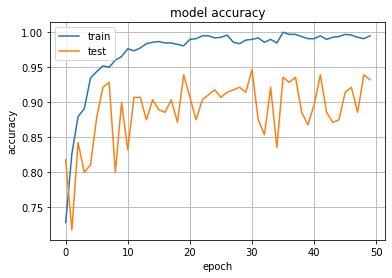

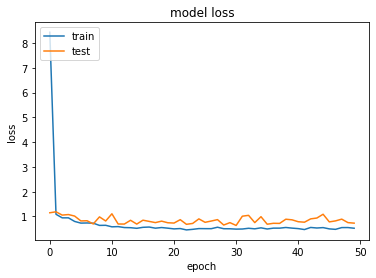

In [14]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.06658858]]
This Railway track has fault


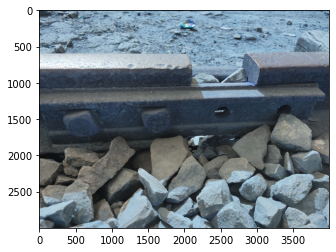

In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Test/Defective/IMG_20201114_102200.jpg')
plt.imshow(img)
img = cv2.resize(img,(600,600))
img = np.reshape(img,[1,600,600,3])

classes = model_mul.predict(img)

print(classes)
if classes>0.5:
    print("This Railway track has no fault")
else:
    print("This Railway track has fault")

[[0.06658858]]
This Railway track has fault


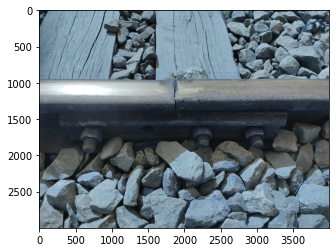

In [16]:
import cv2
import numpy as np
img = cv2.imread('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Test/Defective/IMG_20201114_102415.jpg')
plt.imshow(img)
img = cv2.resize(img,(600,600))
img = np.reshape(img,[1,600,600,3])

classes = model_mul.predict(img)


print(classes)
if classes>0.5:
    print("This Railway track has no fault")
else:
    print("This Railway track has fault")

[[0.06658858]]
This Railway track has fault


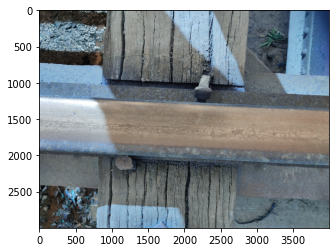

In [17]:
import cv2
import numpy as np
img = cv2.imread('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Test/Non Defective/IMG_20201114_101559.jpg')
plt.imshow(img)
img = cv2.resize(img,(600,600))
img = np.reshape(img,[1,600,600,3])

pred_value = model_mul.predict(img)

print(pred_value)
if pred_value>0.5:
    print("This Railway track has no fault")
else:
    print("This Railway track has fault")

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 600, 600, 3), found shape=(None, 650, 650, 3)


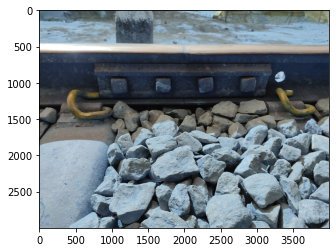

In [18]:
import cv2
import numpy as np
img = cv2.imread('../input/railway-track-fault-detection-dataset2fastener/Dataset 2_Fastener/Test/Non Defective/IMG_20201114_101708.jpg')
plt.imshow(img)
img = cv2.resize(img,(650,650))
img = np.reshape(img,[1,650,650,3])

classes = model_mul.predict(img)

print(classes)
if classes>0.5:
    print("This Railway track has no fault")
else:
    print("This Railway track has fault")